In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy

import pickle
import numpy as np
import pandas as pd
import os
import os.path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# project_name = 'Givenchy_histogram'


('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [4]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)

def loadModel(self):
    read_file = "data/" + self.model_name + ".dat"
    self.model = joblib.load(read_file)
    return self.model


In [5]:
################# 10 cases ###################
################# 10 cases ###################
### 012 (0,3) ###
A_single = load_pickle(path+'/Stanford_network_simulation_0.6_a.pkl')
B_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_b_new.pkl')
C_sequential = load_pickle(path+'/Stanford_network_simulation_0.6_c_new.pkl')
### 345 (3,6) ###
Cen_Degree = load_pickle(path+'/Stanford_network_simulation_Degree_5.pkl')
Cen_Betweenness = load_pickle(path+'/Stanford_network_simulation_betweenness_5.pkl')
Cen_Eigencentrality = load_pickle(path+'/Stanford_network_simulation_eigencentrality_5.pkl')
### 67 (6,8) ###
Active_low = load_pickle(path+'/Stanford_network_simulation_active_low.pkl')
Active_high = load_pickle(path+'/Stanford_network_simulation_active_high.pkl')
### 8 ###
Dynamic = load_pickle(path+'/Stanford_network_simulation_Dynamic.pkl')
### 9 ###
Active_mid = load_pickle(path+'/Stanford_network_simulation_active_mid.pkl')
### 10 ###
Combined = load_pickle(path+'/Stanford_network_simulation_Combined.pkl')
### 11 ###
Givenchy = load_pickle(path+'/Givenchy_network_simulation_new.pkl')


unique_users = [A_single, B_sequential, C_sequential,   
                Cen_Degree, Cen_Betweenness, Cen_Eigencentrality,
                Active_low, Active_high,
                Dynamic, Active_mid, Combined, Givenchy]

# for i in range(0,8):
#     x=[t for t in range(0,300)] 
#     unique_users[i][unique_users[i].time_lapsed.isin(x)]
# x=[0,1,2,3,4,5,6,7,8,9,10,11]
# unique=unique_users[4][unique_users[4].generations.isin(x)]
# unique

In [6]:
Givenchy.time_lapsed.unique()

array([0.0, 1, 1.13, 17.0, 18.68, 21, 11, 22.82, 23.27, 24.93, 24.95,
       24.98, 25.58, 28.13, nan, 31, 41.32, 42.7, 45.6, 47.12, 51, 52.62,
       54.2, 54.53, 57.95, 58.45, 151, 62.63, 601, 79.57, 81, 83.35, 83.65,
       86.1, 90.47, 91, 91.18, 93.5, 101, 96.17, 100.47, 107.67, 191,
       114.33, 116.48, 117.98, 201, 119.77, 41, 123.03, 129.3, 631, 131.72,
       140.83, 145.2, 146.95, 149.22, 149.28, 151.03, 157.47, 158.5, 159.6,
       164.32, 171, 169.77, 170.18, 171.73, 181, 174.25, 177.52, 185.2,
       161, 185.8, 186.2, 187.55, 189.12, 189.32, 195.45, 203.15, 204.43,
       209.4, 210.03, 219.6, 230.27, 256.43, 270.35, 272.07, 61, 329.27,
       331, 339.4, 344.55, 360.22, 366.42, 261, 389.93, 391, 427.85,
       439.17, 453.47, 461, 503.72, 516.63, 516.97, 592.67, 341, 639.22,
       641.32, 703.13, 141, 720.88, 852.97, 873.38, 894.02, 912.15, 930.8,
       944.13, 973.87, 1036.13, 1108.97, 1342.4], dtype=object)

In [17]:
len(Givenchy[Givenchy.time_lapsed.isin([0.0, 1, 1.13, 17.0, 18.68, 21, 11, 22.82, 23.27, 24.93, 24.95,
       24.98, 25.58, 28.13])])

3792

In [31]:
len(Givenchy[Givenchy.time_lapsed.isin([28.13])])

1

In [8]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(color)

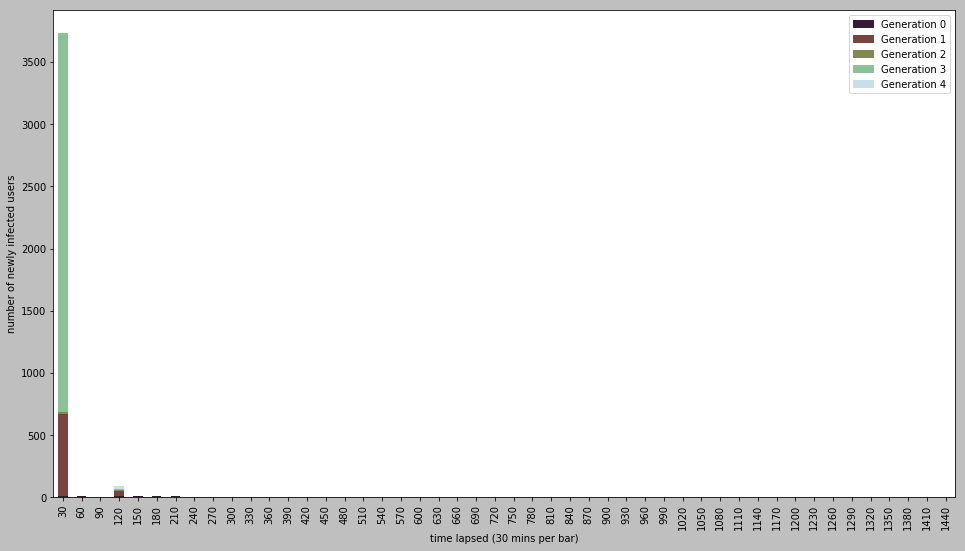

In [9]:
############### For Givenchy ################
############### For Givenchy ################
def plot_time_lapsed_vs_newly_infected_users(unique_users):
    depth = max(unique_users.generations) + 1
    window = 30
    timeframe = 1440
    title = "graph/Time_Givenchy"
    d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
    for i in range(int(int(timeframe)/window)):
        data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
        for generation in range(depth):
            d.iloc[i, generation] = sum(data.generations == generation)
    colors = get_colors(depth)
    ax = d.plot.bar(
        stacked=True, 
        color = colors
    );
    ax.set_xticks(range(48))
    ax.set_xticklabels([(i+1)*30 for i in range(48)])
    ax.set_xlabel('time lapsed (30 mins per bar)')
    ax.set_ylabel('number of newly infected users')
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.plot(title, [15, 9], save=True)
unique=Givenchy[Givenchy.time_lapsed.isin([0.0, 1, 2, 1.13, 19, 17.0, 94, 18.68, 18, 22.82, 23.27, 24.93,
       24.95, 24.98, 25.58, 91, 28.13, 20, 92, 21, 41.32, 42.7, 45.6,
       47.12, 48, 52.62, 54.2, 54.53, 57.95, 58.45, 62.63, 79.57, 83.35,
       83.65, 86.1, 29, 90.47, 91.18, 93.5, 95, 96.17, 100.47, 22, 107.67,
       114.33, 116.48, 117.98, 119.77, 123.03, 129.3, 131.72, 140.83,
       145.2, 146.95, 149.22, 149.28, 151.03, 157.47, 158.5, 159.6, 164.32,
       169.77, 170.18, 171.73, 174.25, 177.52, 185.2, 185.8, 186.2, 187.55,
       189.12, 189.32, 195.45, 203.15, 204.43, 209.4, 210.03, 219.6,
       230.27, 256.43, 270.35, 272.07, 329.27, 339.4, 344.55, 360.22,
       366.42, 389.93, 427.85, 439.17, 453.47, 503.72, 516.63, 516.97,
       592.67, 639.22, 641.32, 703.13, 720.88, 852.97, 873.38, 894.02,
       912.15, 930.8, 944.13, 973.87, 1036.13, 1108.97, 1342.4])]
plot_time_lapsed_vs_newly_infected_users(unique)

# def plot_time_lapsed_vs_newly_infected_users(unique_users):
#     depth = max(unique_users.generations) + 1
#     window = 30
#     timeframe = 1440
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i*60)*window & (unique_users.time_lapsed < ((i+1)*60)*window))]
#         #print(data)
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     print(d)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     for j in range(5): 
#         b=d[0][j]+d[1][j]+d[2][j]+d[3][j]+d[4][j]
# #         b=d[j][0]+d[j][1]+d[j][2]+d[j][3]
#         print(b)
#         plt.text(j, b, b, ha='center', va= 'bottom',fontsize=22)
    
#     ax.set_xticks(range(48))
#     ax.set_xticklabels([(i+1)*30 for i in range(48)])
#     ax.set_xlabel('time lapsed (30 mins per bar)')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList)
#     dzcnapy.plot(title, [15, 9], save=True)
    
# for i in range(11,12):
#     title_name = ["graph/Time_A_single", "graph/Time_B_sequential", "graph/Time_C_sequential",
#      "graph/Time_Cen_Degree", "graph/Time_Cen_Betweenness", "graph/Time_Cen_Eigencentrality",
#      "graph/Time_Active_low","graph/Time_Active_high","graph/Time_Dynamic","graph/Time_Active_mid",
#                  "graph/Time_Combined","graph/Time_Givenchy"]
#     title = title_name[i]
#     x=[0.0, 1, 2, 1.13, 19, 17.0, 94, 18.68, 18, 22.82, 23.27, 24.93,
#        24.95, 24.98, 25.58, 91, 28.13, 20, 92, 21, 41.32, 42.7, 45.6,
#        47.12, 48, 52.62, 54.2, 54.53, 57.95, 58.45, 62.63, 79.57, 83.35,
#        83.65, 86.1, 29, 90.47, 91.18, 93.5, 95, 96.17, 100.47, 22, 107.67,
#        114.33, 116.48, 117.98, 119.77, 123.03, 129.3, 131.72, 140.83,
#        145.2, 146.95, 149.22, 149.28, 151.03, 157.47, 158.5, 159.6, 164.32,
#        169.77, 170.18, 171.73, 174.25, 177.52, 185.2, 185.8, 186.2, 187.55,
#        189.12, 189.32, 195.45, 203.15, 204.43, 209.4, 210.03, 219.6,
#        230.27, 256.43, 270.35, 272.07, 329.27, 339.4, 344.55, 360.22,
#        366.42, 389.93, 427.85, 439.17, 453.47, 503.72, 516.63, 516.97,
#        592.67, 639.22, 641.32, 703.13, 720.88, 852.97, 873.38, 894.02,
#        912.15, 930.8, 944.13, 973.87, 1036.13, 1108.97, 1342.4]
#     unique=unique_users[i][unique_users[i].time_lapsed.isin(x)]
#     print(len(unique))
#     plot_time_lapsed_vs_newly_infected_users(unique)

In [6]:
####################### for active_low and active_high ##########################
####################### for active_low and active_high ##########################
#### def plot_time_lapsed_vs_newly_infected_users(unique_users):
###     depth = max(unique_users.generations) + 1
#     window = 30
#     timeframe =300
# #     title = 'time lapsed vs newly infected users for event {}'.format(unique_users)
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     ax.set_xticks(range(10))
#     ax.set_xticklabels([i*30 for i in range(10)])
#     ax.set_xlabel('time lapsed')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList)
#     dzcnapy.plot(title, [15, 9], save=True)
    
# def plot_time_lapsed_vs_newly_infected_users(unique_users):
#     depth = max(unique_users.generations) + 1
#     window = 30
#     timeframe = 300
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     print(d)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     for j in range(10): 
#         b=d[0][j]+d[1][j]+d[2][j]+d[3][j]+d[4][j]+d[5][j]+d[6][j]+d[7][j]+d[8][j]+d[9][j]+d[10][j]
# #         b=d[j][0]+d[j][1]+d[j][2]+d[j][3]
#         print(b)
#         plt.text(j, b, b, ha='center', va= 'bottom',fontsize=22)
    
#     ax.set_xticks(range(10))
#     ax.set_xticklabels([((i+1)*30) for i in range(10)])
#     ax.set_xlabel('time lapsed (30 mins per bar)')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList)
#     dzcnapy.plot(title, [15, 9], save=True)
    
# for i in range(9,10):
#     title_name = ["graph/Time_A_single", "graph/Time_B_sequential", "graph/Time_C_sequential",
#         "graph/Time_Cen_Degree", "graph/Time_Cen_Betweenness", "graph/Time_Cen_Eigencentrality",
#         "graph/Time_Active_low","graph/Time_Active_high","graph/Time_Dynamic","graph/Time_Active_mid"]
#     title = title_name[i]
#     x=[t for t in range(0,300)]
#     unique=unique_users[i][unique_users[i].time_lapsed.isin(x)]
#     plot_time_lapsed_vs_newly_infected_users(unique)

In [7]:
######################## for centrality ##########################
######################## for centrality ##########################
# def plot_time_lapsed_vs_newly_infected_users(unique_users):
#     depth = max(unique_users.generations) + 1
#     window = 1
#     timeframe = 5
# #     title = 'time lapsed vs newly infected users for event {}'.format(unique_users)
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     print(d)
#     for j in range(5): 
#         b=d[0][j]+d[1][j]+d[2][j]+d[3][j]+d[4][j]
#         if j == 0:
#             b=5
#         print(b)
#         plt.text(j, b, b, ha='center', va= 'bottom',fontsize=22)
#     ax.set_xticks(range(5))
#     ax.set_xticklabels([((i+1)*30) for i in range(5)])
#     ax.set_xlabel('time lapsed (30 mins per bar)')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList)
#     dzcnapy.plot(title, [15, 9], save=True)
    
# for i in range(5,6):
#     title_name = ["graph/Time_A_single", "graph/Time_B_sequential", "graph/Time_C_sequential",
#         "graph/Time_Cen_Degree", "graph/Time_Cen_Betweenness", "graph/Time_Cen_Eigencentrality",
#         "graph/Time_Active_low","graph/Time_Active_high","graph/Time_Dynamic","graph/Time_Active_mid"]
#     title = title_name[i]
#     x=[0,1,2,3,4,5,6]
#     unique=unique_users[i][unique_users[i].generations.isin(x)]
#     print(len(unique))
# #     for j in range(6):
# #         print(len(unique[unique.time_lapsed.isin([j])]))
#     #print(unique=unique_users[i][unique_users[i].time_lapsed.isin(x)])
#     plot_time_lapsed_vs_newly_infected_users(unique)

38090
     0    1     2      3     4     5
0.0  5    0     0      0     0     0
1.0  5    0     0      0     0     0
2.0  5   40     0      0     0     0
3.0  5  330   361      0     0     0
4.0  0  679  3518   2210     0     0
5.0  0   75  1621  10218  4987     0
6.0  0   13   119   1721  7789  4389
5
5
45
696
6407
16901
14031


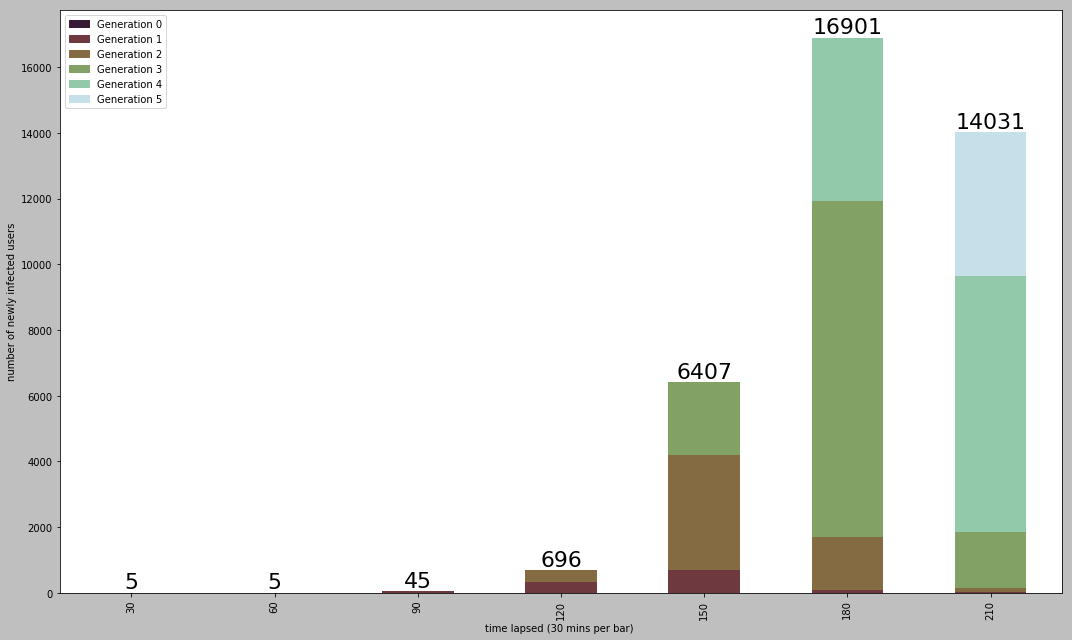

In [10]:
# def plot_time_lapsed_vs_newly_infected_users(unique_users):
#     depth = max(unique_users.generations) + 1
#     window = 1
#     timeframe = 7
# #     title = 'time lapsed vs newly infected users for event {}'.format(unique_users)
#     d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
    
#     for i in range(int(int(timeframe)/window)):
#         data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
#         for generation in range(depth):
#             d.iloc[i, generation] = sum(data.generations == generation)
#     colors = get_colors(depth)
#     ax = d.plot.bar(
#         stacked=True, 
#         color = colors
#     );
#     print(d)
#     for j in range(7):
#         b=d[0][j]+d[1][j]+d[2][j]+d[3][j]+d[4][j]+d[5][j]
# #         if j == 6:
# #             b=d[0][j]+d[1][j]+d[2][j]+d[3][j]+d[4][j]+d[5][j]+5
#         print(b)
#         plt.text(j, b, b, ha='center', va= 'bottom',fontsize=22)
#     ax.set_xticks(range(7))
#     ax.set_xticklabels([((i+1)*30) for i in range(7)])
#     ax.set_xlabel('time lapsed (30 mins per bar) ')
#     ax.set_ylabel('number of newly infected users')
#     patchList = []
#     for index in range(depth):
#         data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
#         patchList.append(data_key)
#     plt.legend(handles=patchList,loc='upper left')
#     dzcnapy.plot(title, [15, 9], save=True)
    
# for i in range(10,11):
#     title_name = ["graph/Time_A_single", "graph/Time_B_sequential", "graph/Time_C_sequential",
#         "graph/Time_Cen_Degree", "graph/Time_Cen_Betweenness", "graph/Time_Cen_Eigencentrality",
#         "graph/Time_Active_low","graph/Time_Active_high","graph/Time_Dynamic","graph/Time_Active_mid",
#                  "graph/Time_Combined"]
#     title = title_name[i]
#     x=[0,1,2,3,4,5]
#     unique=unique_users[i][unique_users[i].generations.isin(x)]
#     print(len(unique))
#     plot_time_lapsed_vs_newly_infected_users(unique)

In [ ]:
# A_single[A_single.generations.isin(range(0,6))]
# unique_users = [A_single, B_sequential, C_sequential,
#         Cen_Degree, Cen_Betweenness, Cen_Eigencentrality,
#         Active_low,Active_high]
# unique_users[3]
# x=[0,1,2,3,4,5]
# unique_users[3][unique_users[3].generations.isin(x)]

In [ ]:
# Cen_Eigencentrality[Cen_Eigencentrality.time_lapsed.isin(range(0,6))]["generations"].unique()

In [ ]:
# for i in range(len(Cen_Eigencentrality)):
#     Cen_Eigencentrality.iloc[i,"generations"]

In [ ]:
# a=[x for x in range(len(Cen_Eigencentrality)) if len(Cen_Eigencentrality.iloc[x,"generations"])==False]